# **E-commerce Fault Detection**

## Problems

There is currently a promotional program offering a 30% discount on the total bill, up to a maximum of 20k. Some customers are colluding with sellers to exploit this program. The file `transaction_data.csv` contains customer transaction data:

Please prepare a report answering the following questions:

- What is the total bill range that has the highest number of transactions?
- Who are the top three buyers likely involved in fraudulent activities and why?
- Who are the top three sellers likely involved in fraudulent activities and why?

## Answers

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqldf

### Data preperation

In [2]:
# Read and process data
df = pd.read_csv('transaction_data.csv')

## Convert to datetime on time columns
df['txn_time'] = pd.to_datetime(df['txn_time'])
df['txn_date'] = pd.to_datetime(df['txn_date'])

## Convert to string on Categorical columns
df['order_id'] = df['order_id'].astype('str')
df['uid'] = df['uid'].astype('str')
df['shop_id'] = df['shop_id'].astype('str')
df['shop_owner_uid'] = df['shop_owner_uid'].astype('str')

df.head()

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
0,2019-10-30 13:37:00,2019-10-30,142008725,102161515,1005,100054430,70000,20000
1,2019-10-30 20:26:00,2019-10-30,142119377,102867263,10050,1792841,80000,20000
2,2019-10-30 12:22:00,2019-10-30,141986418,100401383,10075,100155720,125000,20000
3,2019-10-30 09:46:00,2019-10-30,141941958,103213155,10088,103894677,82000,20000
4,2019-10-30 21:56:00,2019-10-30,142139275,101003290,10142,103909421,260000,20000


### Q1. What is the total bill range that has the highest number of transactions?

c:\Users\LAP14761-local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LAP14761-local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


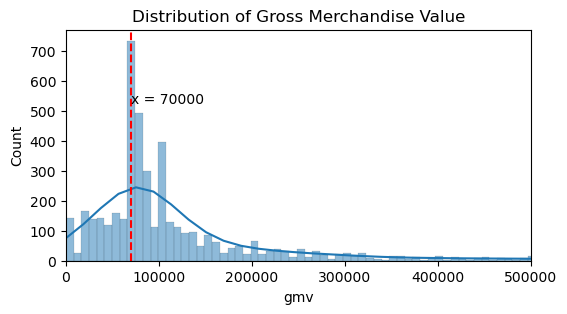

In [3]:
# Plotting the graph
fig, ax = plt.subplots(figsize=(6,3))

ax = sns.histplot(data=df, x=df.gmv, kde=True)
plt.xlim(0, 500000)

# Adding a title
ax.set_title('Distribution of Gross Merchandise Value')

# Finding the x value with the highest number of orders
max_value = df.gmv.value_counts().sort_values(ascending=False).index[0]

# Drawing a vertical line
ax.axvline(x=max_value, color='r', linestyle='dashed', label='Maximum Order Quantity')

# Displaying the x value at the line position
ax.annotate(f'x = {max_value}', (max_value, df.gmv.value_counts().sort_values(ascending=False).max()))

plt.show()

Based on the data set, the Gross Merchandise Value (GMV) of `70,000` has the highest number of orders placed.






### Q2: Who are the top three buyers likely involved in fraudulent activities and why?

Customers who can acquire a large number of vouchers in a single day exhibit abnormal behavior, so we categorize these customers as ‘faulty’

In [5]:
fault_buyer_query = """
SELECT uid, txn_date, count(rebate) as num_rebate
FROM df
GROUP BY uid, txn_date
ORDER BY num_rebate DESC
"""

# Run the query
fault_buyer = sqldf.run(fault_buyer_query)
fault_buyer.head()

,uid,txn_date,num_rebate
0,100605978,2019-11-01 00:00:00,16
1,100205391,2019-10-31 00:00:00,14
2,100205391,2019-10-30 00:00:00,10
3,103023839,2019-11-01 00:00:00,10
4,103653018,2019-11-01 00:00:00,10


Based on the number of rebate placed in one dat by these types of customers, the top three ‘fault’ customers are `100605978`, `103023839`, and `100205391`.

### Q3: Who are the top three seller likely involved in fraudulent activities and why?

In Vietnam, the smallest current currency unit is 1,000 VND. Therefore, any order_id with a Gross Merchandise Value (GMV) less than 1,000, meaning a total spend less than 1,000 VND, are considered unreasonable. The idea here is to extract the shop_id and order_id with the highest frequency of GMV less than 1000.

In [ ]:
query_1 = """
SELECT shop_id, order_id
FROM df
WHERE gmv < 1000
"""

# Run the query
df_query_1 = sqldf.run(query_1)

query_2 = """
SELECT shop_id, count(order_id) as num_order
FROM df_query_1
ORDER BY num_order DESC
"""

# Run the query
df_query_2 = sqldf.run(query_2)


,shop_id,num_order
0,30140,4
1,30185,3
2,30148,3
3,8947,2
4,30223,2


Based on the results, we identify three shops that are potentially faulty: `30140`, `30185`, and `30148`.